

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## PGE 383 Graduate Student Project 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


## k-Nearest Neighbours in High Dimensional Predictor Feature Space

Demonstrate the impact of the curse of dimensionality on k-Nearest Neighbours


#### Gabriella Small
#### Walker Department of Mechanical Engineering, The Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin

### Executive Summary

k Nearest Neighbors (or kNN) is a supervised machine learning model that allows you to predict a response from a set of predictor features based off of the k closest data points. However, this model is based off of a distance metric, and so the curse of dimensionality becomes a problem as you add more features and this distance becomes meaningless. To demonstrate this problem, this workflow demonstrates a kNN model on a ficitous data set as the number of dimensions increases from 2 to 10 to 50. We learned that as the number of features increases, even to 10, kNN become slow and inaccurate. Going forwards, it is recommonded to perform feature selection to avoid the curse of dimensionality to ensure kNN is working properly. 

### Import Packages
Import required packages for the workflow. All should be standard with Anaconda.

In [1]:
from sklearn.neighbors import KNeighborsRegressor           # nearest k neighbours model
from sklearn import metrics                                 # measures to check our models
import pandas as pd                                         # organizing data
import pandas.plotting as pd_plot                           # plotting the data
import numpy as np                                          # creating random data
import matplotlib.pyplot as plt                             # plotting the data
from sklearn.model_selection import train_test_split        # train and test split
from sklearn.preprocessing import StandardScaler            # for standardization of the features
import time                                                 # for seeing how long things take 
#set random seed
seed = 13045
np.random.seed(seed=seed)
cmap = plt.cm.inferno                                       # select color map
import warnings
warnings.filterwarnings('ignore')                           # supress warnings

### Functions

The following function will be used in the workflow.


The following function is adapted from Professor Michael Pyrcz (@GeostatsGuy), SubSurfuceDataAnalytics_kNearestNeighbour.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_kNearestNeighbour.ipynb).

In [2]:
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points 
    n_classes = 10
    cmap_temp = plt.cm.inferno
    #make the step size pretty small to help speed up computation time
    xplot_step = (x_max-x_min)/5; yplot_step = (y_max-y_min)/5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step),
                     np.arange(y_min, y_max, yplot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap_temp,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap_temp, norm=None, vmin=z_min, vmax=z_max, alpha=1.0, linewidths=0.8, edgecolors="black")
    plt.title(title)
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(response.name, rotation=270, labelpad=20)

### Load Data

The following workflow applies to a synthetic dataset created below. The means of the features are randomly chosen between 0 and 10 (of arbitrary units) and are correlated based off of a random covariance matrix with values between -3 and +3.

The model will be created on all features, but for visualization purposes, only the 1st two features will be plotted.


In [3]:
#how many samples we want
num_samples = 100

#pick random numbers between 0 and 10 to be the means of the features 
np.random.seed(seed=seed)
means3 = np.random.randint(10, size=(3)) # 2 features and 1 response
means11 = np.random.randint(10, size=(11)) #10 features and 1 response
means51 = np.random.randint(10, size=(51)) #50 features and 1 response

# The desired covariance matrix.
mat = np.random.randint(-3,3,size=(3,3))
bsym2 = np.dot(mat, mat.T) # make it positive-semidefinite to match definition of covariance matrix
mat11 = np.random.randint(-5,5,size=(11,11))
b_symm11 = np.dot(mat11, mat11.T) ## make it positive-semidefinite to match definition of covariance matrix

mat51 = np.random.randint(-5,5,size=(51,51))
b_symm51 = np.dot(mat51, mat51.T) ## make it positive-semidefinite to match definition of covariance matrix

# Generate the random samples
rng3 = np.random.default_rng(seed)
y3 = rng3.multivariate_normal(means3, bsym2, size=num_samples)
rng11 = np.random.default_rng(seed)
y11 = rng11.multivariate_normal(means11, b_symm11, size=num_samples)
rng51 = np.random.default_rng(seed)
y51 = rng51.multivariate_normal(means51, b_symm51, size=num_samples)

#create variable names 
cols = [f'Feature {i}' for i in range(1,11)]
cols.append('Response')

cols50 = [f'Feature {i}' for i in range(1,51)]
cols50.append('Response')

# put into data frame
df_2 = pd.DataFrame(y3, columns = ['Feature 1','Feature 2','Response'])
df_10 = pd.DataFrame(y11, columns = cols)
df_50 = pd.DataFrame(y51, columns = cols50)

#df_2.describe()
# for plotting things, find max and mins
mins2= df_2.min()
maxs2 = df_2.max()
mins10= df_10.min()
maxs10 = df_10.max()
mins50= df_50.min()
maxs50 = df_50.max()
# look at the data to make sure nothing weird happened
df_10.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Response
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.164610,7.144751,4.333156,6.507522,4.153318,-2.047261,5.421427,2.628883,6.379498,4.687242,8.786962
std,6.037639,12.102869,10.844226,13.886168,10.994279,9.861069,10.912537,9.342573,9.538338,8.791390,8.083291
min,-17.807640,-18.840918,-20.240888,-37.660302,-24.551329,-28.800747,-16.951237,-17.853016,-16.142583,-15.389691,-15.900910
25%,-0.634777,-1.867418,-3.013187,-1.325579,-3.827110,-10.402036,-1.677967,-3.185041,-0.338336,-0.366072,2.645603
50%,3.027121,7.302338,3.768833,7.860923,4.528812,-1.031747,3.864847,1.321331,7.452364,4.116517,8.756360
75%,7.644968,14.577814,12.771637,15.651486,10.881527,4.825126,10.402668,8.333650,12.977537,9.676147,13.782217
max,16.098173,40.044013,27.398236,37.639375,35.898242,20.305515,37.266660,26.588716,30.632392,37.081740,30.454143


Here we can look at the 10 features dataset statistics to make sure everything looks good. The means should be between 0 and 10 and all features have 100 data points.

## Visualize the data
Plot the features to see what the data looks like for the 2 and 10 features datasets. Look for any irregularities or strong correlations. Note this code block will take a few seconds to finish running because of the curse of dimensionality.

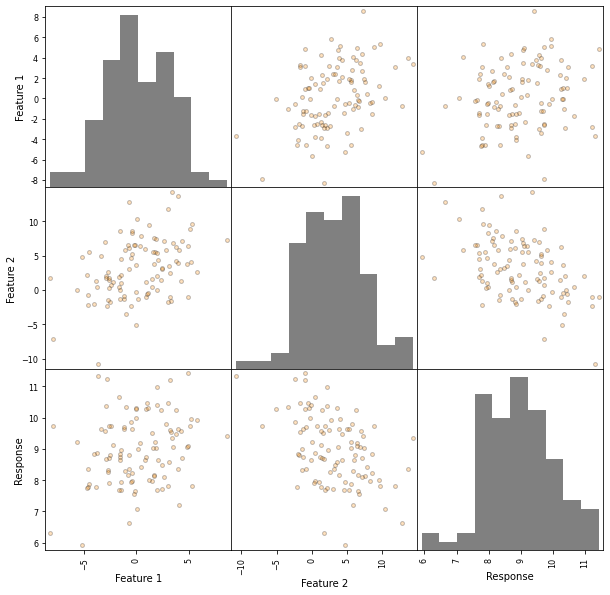

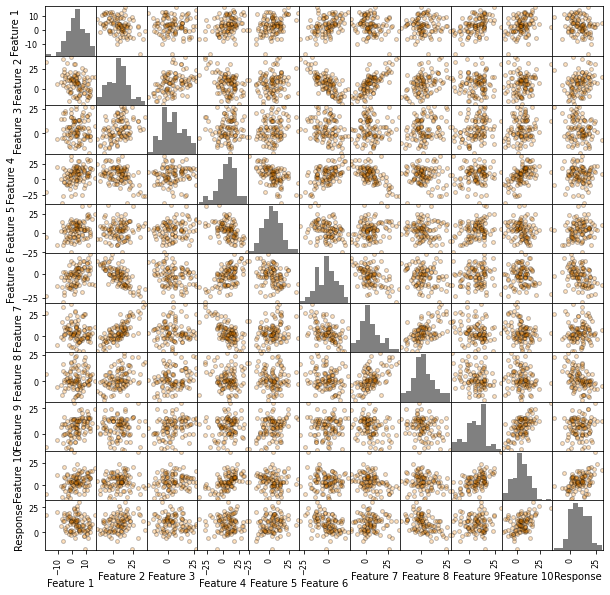

In [4]:
pd_plot.scatter_matrix(df_2, alpha = 0.25,s = 60,                # pandas matrix scatter plot
 figsize=(10, 10),color = 'darkorange', edgecolor = 'black', hist_kwds={'color':['grey']})
plt.show()

pd_plot.scatter_matrix(df_10, alpha = 0.25,s = 60,                # pandas matrix scatter plot
 figsize=(10, 10),color = 'darkorange', edgecolor = 'black', hist_kwds={'color':['grey']})
plt.show()


We are already starting to see the problems with high dimensionality. It's hard to see what's going on with 10 features and we can't even visualize the 50 features dataset! Furthermore, this code takes a while to run.

### The Curse of Dimensionality
What is the curse of dimensionality? In short, working with a lot of dimensions (often defined as anything greater than 10 features) causes lots of problems! Some of which are detailed here: 

* As you can see above, it is hard to visualize your data and your model with higher dimensions and thus it is also harder to interpret and check your model.
* Also demonstrated above, multicolinearity becomes more of a problem with higher dimensions, more of the features are correlated with each other. This redundancy can lead to model instability.
* Coverage also becomes a problem at higher dimensions. You normally will not have samples that perfectly cover the entire feature space, and coverage exponentially decreases as the number of dimensions increases.
* Most importantly for this example, distances become inaccurate and meaningless in higher dimensional space and k-Nearest Neighbors uses distance metrics for its calculation.
* Lastly, more features cause higher computational time and memory in the computer.

We will demonstrate how the curse of dimensionality affects k-Nearest Neighbors below:

### High Dimensional k-Nearest Neighbors

Now that we have created our datasets to work with, we can move onto the actual model. Here are the steps this workflow will take to build and test the k-Nearest Neighbors:
1. Standardize the features

2. Train-test split

3. Visualize the train-test split 

4. Tuning the hyperparameters

5. Fit and visualize the models



### 1. Standardize the Features

You have to standardize the features to have a mean of 0 and variance of 1 because kNN uses distance calculations, so you must standardize the features so all features can be compared. We will use scikit-learn's StandardScaler to do this.

In [5]:
#standardization
transform = StandardScaler(); 

#create arrays for the names of the features 
feat2 = [f'Feature {i}' for i in range(1,3)]
feat10 = [f'Feature {i}' for i in range(1,11)]
feat50 = [f'Feature {i}' for i in range(1,51)]

for j in range(0,len(feat2)):
    standard2= transform.fit_transform(df_2.loc[:,feat2].values)[:,j] 
    df_2[f'SFeat {j+1}'] = standard2
    
for j in range(0,len(feat10)):
    standard10= transform.fit_transform(df_10.loc[:,feat10].values)[:,j] 
    df_10[f'SFeat {j+1}'] = standard10
    
for j in range(0,len(feat50)):
    standard50= transform.fit_transform(df_50.loc[:,feat50].values)[:,j] 
    df_50[f'SFeat {j+1}'] = standard50
#look at the data to make sure the added standardized features worked
df_10.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,SFeat 1,SFeat 2,SFeat 3,SFeat 4,SFeat 5,SFeat 6,SFeat 7,SFeat 8,SFeat 9,SFeat 10
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.164610,7.144751,4.333156,6.507522,4.153318,-2.047261,5.421427,2.628883,6.379498,4.687242,...,-3.164136e-17,8.604228e-17,8.659740e-17,-3.136380e-17,6.002143e-17,-1.887379e-17,4.385381e-17,-5.551115e-18,7.813195e-17,2.775558e-17
std,6.037639,12.102869,10.844226,13.886168,10.994279,9.861069,10.912537,9.342573,9.538338,8.791390,...,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-17.807640,-18.840918,-20.240888,-37.660302,-24.551329,-28.800747,-16.951237,-17.853016,-16.142583,-15.389691,...,-3.491084e+00,-2.157883e+00,-2.277511e+00,-3.196730e+00,-2.624024e+00,-2.726709e+00,-2.060508e+00,-2.203363e+00,-2.373112e+00,-2.295209e+00
25%,-0.634777,-1.867418,-3.013187,-1.325579,-3.827110,-10.402036,-1.677967,-3.185041,-0.338336,-0.366072,...,-6.324538e-01,-7.483821e-01,-6.808557e-01,-5.669356e-01,-7.295278e-01,-8.515166e-01,-6.538497e-01,-6.254394e-01,-7.078463e-01,-5.776984e-01
50%,3.027121,7.302338,3.768833,7.860923,4.528812,-1.031747,3.864847,1.321331,7.452364,4.116517,...,-2.288668e-02,1.308627e-02,-5.230118e-02,9.795497e-02,3.432566e-02,1.035009e-01,-1.433601e-01,-1.406614e-01,1.130460e-01,-6.524576e-02
75%,7.644968,14.577814,12.771637,15.651486,10.881527,4.825126,10.402668,8.333650,12.977537,9.676147,...,7.458096e-01,6.172512e-01,7.820745e-01,6.618118e-01,6.150566e-01,7.004321e-01,4.587692e-01,6.136968e-01,6.952237e-01,5.703350e-01
max,16.098173,40.044013,27.398236,37.639375,35.898242,20.305515,37.266660,26.588716,30.632392,37.081740,...,2.152948e+00,2.731997e+00,2.137661e+00,2.253227e+00,2.901950e+00,2.278190e+00,2.932926e+00,2.577506e+00,2.555485e+00,3.703362e+00


### 2. Split the Data into Training and Testing

Using sklearn's train/test split to randomly withhold 20% of the data for testing.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_2.iloc[:,[3,4]], df_2.iloc[:,2], test_size=0.2, random_state=seed)
y_train = pd.DataFrame({'Response':y_train.values})
y_test = pd.DataFrame({'Response':y_test.values})

X_train10, X_test10, y_train10, y_test10 = train_test_split(df_10.iloc[:,11:], df_10.iloc[:,11], test_size=0.2, random_state=seed)
y_train10 = pd.DataFrame({'Response':y_train10.values})
y_test10 = pd.DataFrame({'Response':y_test10.values})

X_train50, X_test50, y_train50, y_test50 = train_test_split(df_50.iloc[:,51:], df_50.iloc[:,51], test_size=0.2, random_state=seed)
y_train50 = pd.DataFrame({'Response':y_train50.values})
y_test50 = pd.DataFrame({'Response':y_test50.values})
X_train.head()


,SFeat 1,SFeat 2
60,-0.899893,-0.672288
99,-0.560818,-0.749034
80,-0.223809,0.364558
22,0.476537,0.152732
96,-0.401808,0.614409


### 3. Visualize the Features and Train/Test Split

View histograms of the training and testing data to make sure nothing looks out of place for the first two features and the response features.

Afterwards look at scatter and colored plots of the first two features to see their relationship with each other and the response feature.

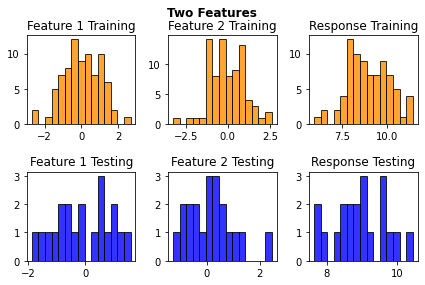

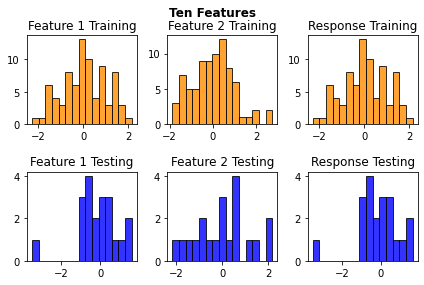

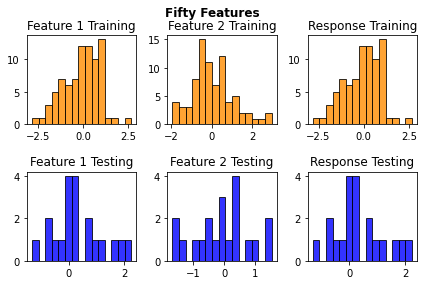

In [7]:
#make sure distributions are the same between test and train
#plot the training in orange and the testing in blue
# 2 features
bins = 15
plt.subplot(231)
plt.hist(X_train["SFeat 1"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=bins)
plt.title('Feature 1 Training'); 

plt.subplot(232)
plt.hist(X_train["SFeat 2"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=bins)
plt.title('Feature 2 Training');# 

plt.subplot(233)
plt.hist(y_train['Response'], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=bins)
plt.title('Response Training'); 

plt.subplot(234)
plt.hist(X_test["SFeat 1"], alpha = 0.8, color = 'blue', edgecolor = 'black', bins=bins)
plt.title('Feature 1 Testing');

plt.subplot(235)
plt.hist(X_test["SFeat 2"], alpha = 0.8, color = 'blue', edgecolor = 'black', bins=bins)
plt.title('Feature 2 Testing');

plt.subplot(236)
plt.hist(y_test['Response'], alpha = 0.8, color = 'blue', edgecolor = 'black', bins=bins)
plt.title('Response Testing'); 

plt.suptitle('Two Features', weight = 'bold')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# ten features
plt.subplot(231)
plt.hist(X_train10["SFeat 1"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=bins)
plt.title('Feature 1 Training'); 

plt.subplot(232)
plt.hist(X_train10["SFeat 2"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=bins)
plt.title('Feature 2 Training');

plt.subplot(233)
plt.hist(y_train10['Response'], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=bins)
plt.title('Response Training'); 

plt.subplot(234)
plt.hist(X_test10["SFeat 1"], alpha = 0.8, color = 'blue', edgecolor = 'black', bins=bins)
plt.title('Feature 1 Testing'); 

plt.subplot(235)
plt.hist(X_test10["SFeat 2"], alpha = 0.8, color = 'blue', edgecolor = 'black', bins=bins)
plt.title('Feature 2 Testing');

plt.subplot(236)
plt.hist(y_test10['Response'], alpha = 0.8, color = 'blue', edgecolor = 'black', bins=bins)
plt.title('Response Testing'); 
plt.suptitle('Ten Features', weight = 'bold')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


# fifty features
plt.subplot(231)
plt.hist(X_train50["SFeat 1"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=bins)
plt.title('Feature 1 Training'); 

plt.subplot(232)
plt.hist(X_train50["SFeat 2"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=bins)
plt.title('Feature 2 Training');

plt.subplot(233)
plt.hist(y_train50['Response'], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=bins)
plt.title('Response Training'); 

plt.subplot(234)
plt.hist(X_test50["SFeat 1"], alpha = 0.8, color = 'blue', edgecolor = 'black', bins=bins)
plt.title('Feature 1 Testing'); 

plt.subplot(235)
plt.hist(X_test50["SFeat 2"], alpha = 0.8, color = 'blue', edgecolor = 'black', bins=bins)
plt.title('Feature 2 Testing');

plt.subplot(236)
plt.hist(y_test50['Response'], alpha = 0.8, color = 'blue', edgecolor = 'black', bins=bins)
plt.title('Response Testing'); 
plt.suptitle('Fifty Features', weight = 'bold')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

The above distributions look pretty good without any noticible outliers or skewedness and the testing data looks similar to the training. But again we run into the problems with high dimensional datasets - we cannot visualize all of the features in the larger datasets, we can only pick out a few for demonstration purposes.

Now let's look look at a colored scatter plot to see how the first two features relate to each other and the response feature.

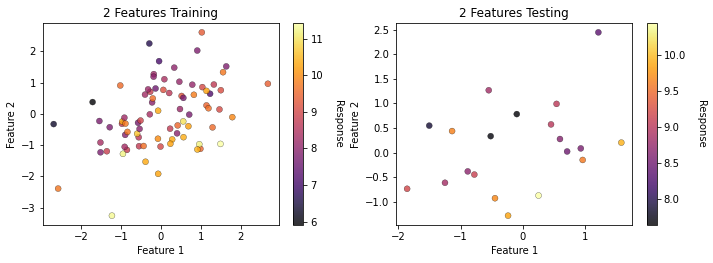

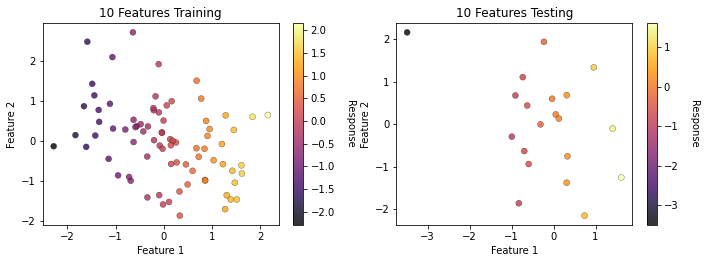

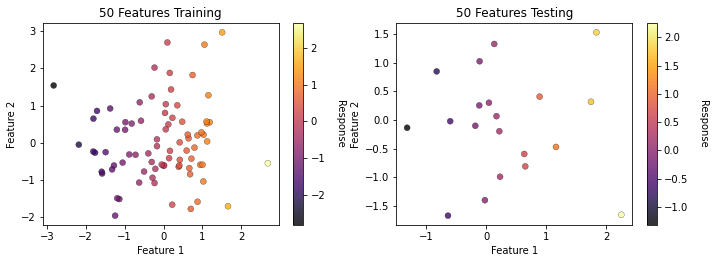

In [8]:
#two features
plt.subplot(121)
im = plt.scatter(X_train["SFeat 1"],X_train["SFeat 2"], c=y_train['Response'], cmap=cmap, alpha=0.8, linewidths=0.3, edgecolors="black") 
plt.title('2 Features Training'); plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Response", rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X_test["SFeat 1"],X_test["SFeat 2"], c=y_test['Response'],  cmap=cmap, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('2 Features Testing'); plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Response", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2)
plt.show()

#ten features
plt.subplot(121)
im = plt.scatter(X_train10["SFeat 1"],X_train10["SFeat 2"],c=y_train10['Response'],cmap=cmap, alpha=0.8, linewidths=0.3, edgecolors="black") 
plt.title('10 Features Training'); plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Response", rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X_test10["SFeat 1"],X_test10["SFeat 2"],c=y_test10['Response'], cmap=cmap, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('10 Features Testing'); plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Response", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2)
plt.show()

#fifty
plt.subplot(121)
im = plt.scatter(X_train50["SFeat 1"],X_train50["SFeat 2"], c=y_train50['Response'],cmap=cmap, alpha=0.8, linewidths=0.3, edgecolors="black") 
plt.title('50 Features Training'); plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Response", rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X_test50["SFeat 1"],X_test50["SFeat 2"], c=y_test50['Response'],  cmap=cmap,  alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('50 Features Testing'); plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Response", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2)
plt.show()

Looking at the above plots, you can see the testing picks a good distribution of features and samples the feature space well, and you can see the relationships between multiple features, overall as feature 1 increases the response increases too.

### 4. Tuning Hyperparameters

You next have to tune the hyperparameters by picking the correct number of nearest neighbors as well as whether the average (insensitive to the distance of data from estimate) or inverse distance (the distance is included) calculation is best. You pick the best number of nearest neighbors by looping over multiple models and calculating the error.

The following code is adapted from Professor Michael Pyrcz (@GeostatsGuy), SubSurfuceDataAnalytics_kNearestNeighbour.ipynb from [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_kNearestNeighbour.ipynb).

In [9]:
k = 1
# initialize the arrays
dist_error = []
unif_error = []
k_mat = []

dist_error10 = []
unif_error10 = []

dist_error50 = []
unif_error50 = []

#loop through k = 1 to 80 neighbors 
while k <= 80:
    #2 features
    #inverse distance weighting
    neigh_dist = KNeighborsRegressor(weights = 'distance', n_neighbors=k, p = 2) # instantiate model
    neigh_dist_fit = neigh_dist.fit(X_train,y_train['Response'])    # train the model with the training data
    y_pred = neigh_dist_fit.predict(X_test) #predict at testing data
    MSE = metrics.mean_squared_error(y_test,y_pred) #calculate the error
    dist_error.append(MSE)
    
    #repeat for average weighing 
    neigh_unif = KNeighborsRegressor(weights = 'uniform', n_neighbors=k, p = 2)
    neigh_unif_fit = neigh_unif.fit(X_train,y_train['Response'])    # train the model with the training data
    y_pred = neigh_unif_fit.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    unif_error.append(MSE)
    k_mat.append(k)
    
    #repeat for 10 features
    neigh_dist10 = KNeighborsRegressor(weights = 'distance', n_neighbors=k, p = 2)
    neigh_dist_fit10 = neigh_dist10.fit(X_train10,y_train10['Response'])    # train the model with the training data
    y_pred10 = neigh_dist_fit10.predict(X_test10)
    MSE10 = metrics.mean_squared_error(y_test10,y_pred10)
    dist_error10.append(MSE10)
    
    neigh_unif10 = KNeighborsRegressor(weights = 'uniform', n_neighbors=k, p = 2)
    neigh_unif_fit10 = neigh_unif10.fit(X_train10,y_train10['Response'])    # train the model with the training data
    y_pred10 = neigh_unif_fit10.predict(X_test10)
    MSE10 = metrics.mean_squared_error(y_test10,y_pred10)
    unif_error10.append(MSE10)
    
    #and for fifty features
    neigh_dist50 = KNeighborsRegressor(weights = 'distance', n_neighbors=k, p = 2)
    neigh_dist_fit50 = neigh_dist50.fit(X_train50,y_train50['Response'])    # train the model with the training data
    y_pred50 = neigh_dist_fit50.predict(X_test50)
    MSE50 = metrics.mean_squared_error(y_test50,y_pred50)
    dist_error50.append(MSE50)
    
    neigh_unif50 = KNeighborsRegressor(weights = 'uniform', n_neighbors=k, p = 2)
    neigh_unif_fit50 = neigh_unif50.fit(X_train50,y_train50['Response'])    # train the model with the training data
    y_pred50 = neigh_unif_fit50.predict(X_test50)
    MSE50 = metrics.mean_squared_error(y_test50,y_pred50)
    unif_error50.append(MSE50)
    
    k = k + 1

Plot the results of the hyperparameter tuning.

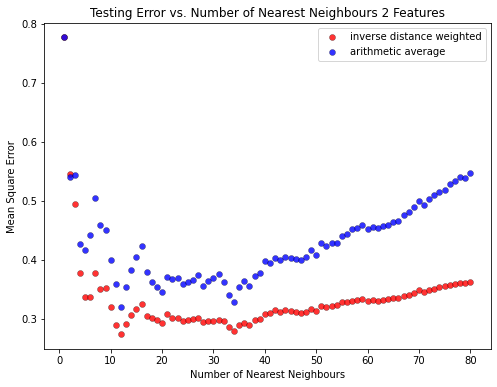

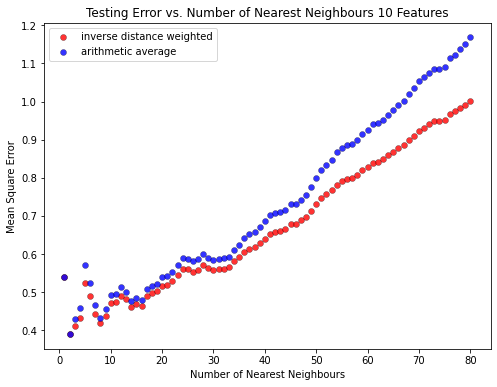

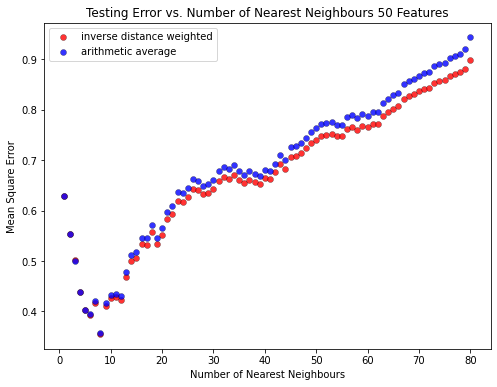

In [10]:
#2 features 
plt.figure(figsize=(8,6))
plt.scatter(k_mat,dist_error, c='red',label = 'inverse distance weighted', alpha=0.8, linewidths=0.3, edgecolors="black")
plt.scatter(k_mat,unif_error, c='blue',label = 'arithmetic average',  alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Testing Error vs. Number of Nearest Neighbours 2 Features'); plt.xlabel('Number of Nearest Neighbours'); plt.ylabel('Mean Square Error')
plt.legend()
plt.show()
#10 features
plt.figure(figsize=(8,6))
plt.scatter(k_mat,dist_error10,c='red',label = 'inverse distance weighted', alpha=0.8, linewidths=0.3, edgecolors="black")
plt.scatter(k_mat,unif_error10,c='blue',label = 'arithmetic average', alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Testing Error vs. Number of Nearest Neighbours 10 Features'); plt.xlabel('Number of Nearest Neighbours'); plt.ylabel('Mean Square Error')
plt.legend()
plt.show()
#50 features
plt.figure(figsize=(8,6))
plt.scatter(k_mat,dist_error50,c='red',label = 'inverse distance weighted', alpha=0.8, linewidths=0.3, edgecolors="black")
plt.scatter(k_mat,unif_error50, c='blue',label = 'arithmetic average',alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Testing Error vs. Number of Nearest Neighbours 50 Features'); plt.xlabel('Number of Nearest Neighbours'); plt.ylabel('Mean Square Error')
plt.legend()
plt.show()


For 2 features the inverse weighting performed better at around 11 nearest neighbors. The MSE has a clear U shaped where it decreases until around 10 neighbors and then MSE increases as the number of neighbors increases. While for 10 features, the MSE already looks off with a minimum around 3 and it increases as the number of neighbors increases. At 50 features, there is a minimum around 8 nearest neighbors. Another problem with the curse of dimensionality is model instability: changing the random seed drastically changes the k hyperparameter for the 10 and 50 feature datasets, not good for building trust in the model and its reproducibility. 

### 5. Fitting and Visualizing the Model

Now that we have tuned k, the hyperparameter, we need to create and fit the model with the hyperparameter and visualize the models. First up is the 2 features.

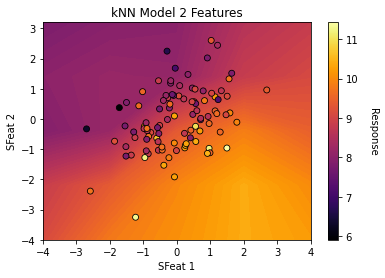

With 2 features the model takes 0.541 seconds to run.


In [11]:
feat2start = time.time()    
neigh = KNeighborsRegressor(weights = 'distance', n_neighbors=11, p = 2)
neigh_fit = neigh.fit(df_2[['SFeat 1','SFeat 2']],df_2['Response'])              # train the model with the training data

visualize_model(neigh_fit,df_2['SFeat 1'],-4, 6,df_2['SFeat 2'],-4, 5,df_2['Response'],mins2[2], maxs2[2],'kNN Model 2 Features')

plt.show()
# Calculate MSE
#train
y_predtrain = neigh_fit.predict(X_train) #predict at testing data
MSE2train = metrics.mean_squared_error(y_train,y_predtrain) 

#test
y_predtest = neigh_fit.predict(X_test) #predict at testing data
MSE2test = metrics.mean_squared_error(y_test,y_predtest) 

feat2stop = time.time()

feat2time = feat2stop-feat2start
print(f'With 2 features the model takes {feat2time:.3f} seconds to run.')

Looking at the plot above, the model appears to fit the data well for only 2 features. The color of the background matches well with the color of the dots (the reponse data) and the code doesn't take more than a few tenths of a second to run.

Now let's do the same thing for 10 features. (This is broken up into one block for creating the model and one block for plotting because it takes so long to run - another problem with the curse of dimensionality!)

In [12]:
#10 features
feat10start = time.time()
neigh10 = KNeighborsRegressor(weights = 'distance', n_neighbors=3, p = 2)
neigh_fit10 = neigh10.fit(df_10[feat10],df_10['Response'])              # train the model with the training data
# Calculate MSE
#train
y_predtrain = neigh_fit10.predict(X_train10) #predict at testing data
MSE10train = metrics.mean_squared_error(y_train10,y_predtrain) 

#test
y_predtest = neigh_fit10.predict(X_test10) #predict at testing data
MSE10test = metrics.mean_squared_error(y_test10,y_predtest) 

feat10 = [f'SFeat {i}' for i in range(1,11)]
n_classes = 10
cmap_temp = plt.cm.inferno
x_max = 4.5
x_min = -3.5
y_max = 5
y_min = -3.5 
#creating the grid to predict on
xplot_step = (x_max-x_min)/5 #too big with anymore steps 
xs = [np.arange(x_min, x_max, xplot_step) for i in range(10)]
grid = np.vstack(np.meshgrid(*xs)).reshape(len(xs), -1).T
Z = neigh_fit10.predict(grid)
feat10mid = time.time()
feat10inter = feat10mid - feat10start

Now plot the model with 10 features (only looking at the first 2 features and the response since you cannot visualize 10 dimensions!)

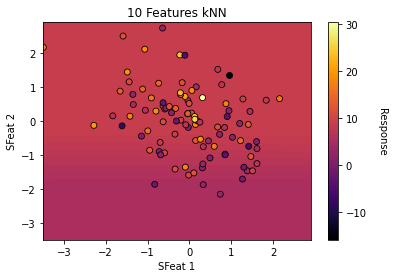

With 10 features the model takes 17.623 seconds to run.


In [13]:
#plotting 
#pull out the first 2 features for plotting purposes
feat10mid2 = time.time()
x_10 = np.asarray([grid[i][0] for i in range(len(grid))])
y_10 = np.asarray([grid[i][1] for i in range(len(grid))])
x_10mesh, y_10mesh = np.meshgrid(np.arange(x_min, x_max, xplot_step), np.arange(x_min, x_max, xplot_step))#np.meshgrid(x_10,y_10)
#again only want the response as the first 2 features change (why we only slice the first 25 data)
zcropped = Z[0:25]
z2 =  zcropped.reshape(x_10mesh.shape)
cs = plt.contourf(x_10mesh, y_10mesh, z2, cmap=cmap_temp, levels=np.linspace(mins10[-1], maxs10[-1], 100))

im = plt.scatter(df_10['SFeat 1'],df_10['SFeat 2'], c=df_10['Response'], cmap=cmap_temp, alpha=1.0, linewidths=0.8, edgecolors="black")
plt.title('10 Features kNN')
plt.xlabel('SFeat 1')
plt.ylabel('SFeat 2')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label('Response', rotation=270, labelpad=20)
plt.show()
feat10stop = time.time()
feat10time = (feat10stop-feat10mid2)+feat10inter
print(f'With 10 features the model takes {feat10time:.3f} seconds to run.')

Looking at the above plot for 10 features, you can see the model doesn't look nearly as good as with 2 features. The data doesn't line up with the model as well and it takes around 20 seconds to run (this number may be different depending on your computer)! The poor fit from not enough samples/coverage, meaningless distances, and the slow running time are all problems from the curse of dimensionality. But if you look closely, there is a slight change in the background color as the model changes, this will completely disappear as we move onto 50 features.

Hold on tight, we're going to try 50 features now! This code will also take some time to run.

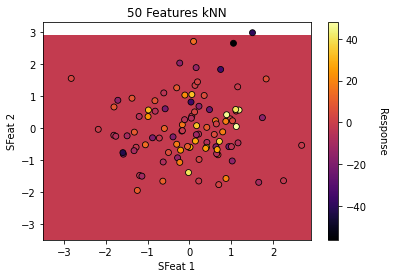

With 50 features the model takes 12.752 seconds to run.


In [14]:
#50 features
feat50start = time.time()
neigh50 = KNeighborsRegressor(weights = 'uniform', n_neighbors=9, p = 2)
neigh_fit50 = neigh50.fit(df_50[feat50],df_50['Response'])              # train the model with the training data

# Calculate MSE
#train
y_predtrain = neigh_fit50.predict(X_train50) #predict at testing data
MSE50train = metrics.mean_squared_error(y_train50,y_predtrain) 

#test
y_predtest = neigh_fit50.predict(X_test50) #predict at testing data
MSE50test = metrics.mean_squared_error(y_test50,y_predtest) 

feat50 = [f'SFeat {i}' for i in range(1,51)]
n_classes = 10
cmap_temp = plt.cm.inferno
x_max = 4
x_min = -3
y_max = 5
y_min = -3
#creating the grid to predict on
xplot_step = (x_max-x_min)/5; yplot_step = (y_max-y_min)/5 #too big with 100 steps 
xs = [np.arange(x_min, x_max, xplot_step) for i in range(50)]
xx,yy = np.meshgrid(np.arange(x_min, x_max, xplot_step),np.arange(x_min, x_max, xplot_step))
stack = np.vstack(xx)
inp = np.c_[xx.ravel(), yy.ravel()]
newinp = np.resize(inp,(50,50))
Z = neigh_fit50.predict(newinp)
feat50mid = time.time()
feat50inter = feat50mid - feat50start
feat50mid2 = time.time()

#again only want the response as the first 2 features change (why we only slice the first 25 data)
zcropped = Z[0:25]
z50 = zcropped.reshape(xx.shape)
cs = plt.contourf(x_10mesh, y_10mesh, z50, cmap=cmap_temp, levels=np.linspace(mins50[-1], maxs50[-1], 100))

im = plt.scatter(df_50['SFeat 1'],df_50['SFeat 2'], c=df_50['Response'], cmap=cmap_temp, alpha=1.0, linewidths=0.8, edgecolors="black")
plt.title('50 Features kNN')
plt.xlabel('SFeat 1')
plt.ylabel('SFeat 2')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label('Response', rotation=270, labelpad=20)
plt.show()
feat50stop = time.time()
feat50time = (feat50stop-feat50mid2)+feat10inter

print(f'With 50 features the model takes {feat50time:.3f} seconds to run.')

For 50 features, you can see the model performs even worse. The predictions for the response all look the same across the features. While it still took around 20 seconds to run, this code did not increase in time significantly from the 10 features. That is because if we ran this model the same way we did 2 or 10, it needed terabytes of memory and would crash! Here is another problem with the curse of dimensionality: memory complexity. So we did not predict across the whole sample space for this example to get it to run for at least the first two features. 

### Runtime vs Dimensionality
Lets visualize the runtimes from above to really get a sense of the complexity increases across dimensions.

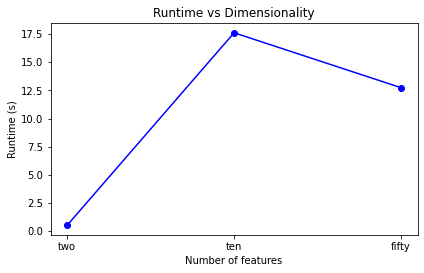

In [15]:
times = [feat2time, feat10time, feat50time]
labls=['two','ten','fifty']
plt.plot(times, color = 'blue', marker = 'o', linestyle = None)
plt.xticks(ticks = [0,1,2],labels = labls)
plt.title('Runtime vs Dimensionality'); 
plt.ylabel('Runtime (s)')
plt.xlabel('Number of features')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

You can see how drastically the runtime increases from 2 to 10 features. As stated above, the runtime for 50 features is a little lower because we could not sample the entire space without running out of memory.

### Mean Squared Error vs Dimensionality
Lastly, we will look at the error in the models for both the training and testing data as dimensionality increases.

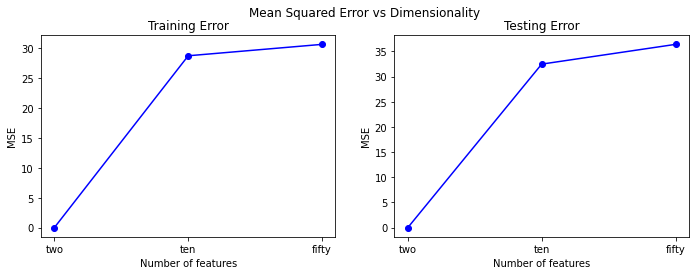

In [16]:
MSEtrain = [MSE2train, MSE10train, MSE50train]
MSEtest = [MSE2test, MSE10test, MSE50test]
labls=['two','ten','fifty']
plt.subplot(121)
plt.plot(MSEtrain, color = 'blue', marker = 'o', linestyle = None)
plt.xticks(ticks = [0,1,2],labels = labls)
plt.ylabel('MSE')
plt.xlabel('Number of features')
plt.title('Training Error')

plt.subplot(122)
plt.plot(MSEtest, color = 'blue', marker = 'o', linestyle = None)
plt.xticks(ticks = [0,1,2],labels = labls)
plt.ylabel('MSE')
plt.xlabel('Number of features')
plt.title('Testing Error')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.7, wspace=0.2, hspace=0.2)
plt.suptitle('Mean Squared Error vs Dimensionality', y=0.8,x =0.75)

plt.show()

You can see that the error in both the testing and the training increases drastically as the number of features increases from 2 to 10 and then increases some more as the number of features increases to 50. Again demonstrating how the model falls apart with the curse of dimensionality and the meaningless distance calculations.

### Results

Overall, k-Nearest Neighbors is not effective as you increase the number of dimensions, even at 10 dimensions. It will not do a good job of predicting the response feature as sampling, coverage, and meaningless distances all become problems of the curse of dimensionality that affect the kNN calculations. The plots of training and testing mean squared error show that the error increases as the number of dimensions increase. Furthermore, the time it takes to run increases drastically and the storage space on the computer becomes a problem as well: space and time complexity, more problems from the curse of dimensionality. You also have to make sacrifices for visualization purposes and can only look at 2 features at a time. To prevent this, you should use feature engineering and dimensionality reduction techniques when the number of features gets too big. 


### Parting Comments 

Gabriella Small, PhD student in Mechanical Engineering

Check out what our lab is working on:

[NMBL Twitter](https://twitter.com/utexasNMBL)


I hope this was helpful,

Gabriella Small

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
